In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

## Randomness

One of the great things about using a computer (and Python) to learn stats is that we can **simulate randomness** through whatever terms we want. We can use this as a way to learn more about some key distributions, or really whatever scenario we want.

In [2]:
#Randomly Take a Value From a List
np.random.choice(['a', 'b', 'c'])

'c'

In [3]:
#Randomly Take an Integer in Range of Numbers
#Note that the upper value is EXCLUSIVE, meaning that here the number will only be 1,2,3 or 4
np.random.randint(1,5)

2

In [4]:
#Randomly Take a Float Value in a Range of Numbers
np.random.uniform(0,2)

0.0918372677286694

We can also use the 'size' argument in any of these functions to return more than one result

In [5]:
np.random.uniform(0,2, size=3)

array([0.61629019, 1.03986484, 1.60046433])

Below, we can our results when we randomly draw a float value between 0 and 2 10,000 times.

(array([1005., 1053., 1034.,  990.,  948., 1007.,  968.,  998., 1011.,
         986.]),
 array([6.31718536e-05, 2.00012897e-01, 3.99962623e-01, 5.99912349e-01,
        7.99862074e-01, 9.99811800e-01, 1.19976153e+00, 1.39971125e+00,
        1.59966098e+00, 1.79961070e+00, 1.99956043e+00]),
 <a list of 10 Patch objects>)

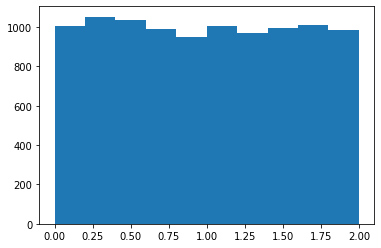

In [6]:
plt.hist(np.random.uniform(0,2, size=10000))

What if we want to make reproducible code that uses a 'random' function? We can use the 'np.random.seed' function so that our 'random' value will be the same every time. The 42 number is completely arbitrary, you can pick whatever you want, but often on homework questions I'll ask you to use this seed so that your results are reproducible.  

**Note that in order for this to work in Jupyter Notebook, you need to run it in the same cell as your random code. If you are running multiple random functions that you want to be re-producible, you need to put this line of code in every cell that has a random function!!**

In [7]:
np.random.seed(42)

In [8]:
np.random.seed(42)
np.random.uniform(0,2)

0.749080237694725

In [9]:
np.random.seed(42)
np.random.uniform(0,2)

0.749080237694725

In [10]:
np.random.uniform(0,2)

1.9014286128198323

## Bernoulli Distribution

We can use the 'Scipy.Stats' module to simulate the distributions that we'll be using. First we'll create a Bernoulli distribution of 0.5, which is the same as a coin flip. As we discussed in lecture, a Bernoulli distribution only requires one input, the probability of success of a single trial.

In [11]:
dist = stats.bernoulli(p=0.5)

The module will find many of the key stats that we referred to in class.

In [12]:
#Mean - Same as Expected Value
dist.mean()

0.5

In [13]:
#PMF of 0
dist.pmf(0)

0.5

In [14]:
#PMF of 1
dist.pmf(1)

0.5

In [15]:
#CDF of 0
dist.cdf(0)

0.5

And below we can simulate the result of throwing 100 coin flips using the 'rvs' function.

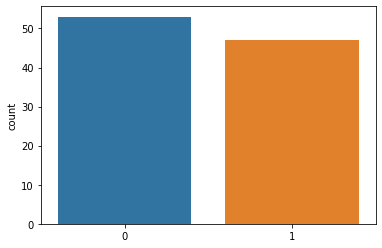

In [16]:
np.random.seed(42)
dist = stats.bernoulli(0.5)
random_numbers = dist.rvs(size=100)
sns.countplot(x=random_numbers)

Below we can see that we got 47 heads and 53 tails (heads = 1, tails = 0) from our simulated distribution.

In [17]:
np.transpose(np.unique(random_numbers, return_counts=True))

array([[ 0, 53],
       [ 1, 47]])

We could also simply find the sum of our result to get the number of heads.

In [18]:
np.sum(random_numbers)

47

Of course if we do another 100 flips we could get a different result. Here we get 52 heads and 48 tails..

In [19]:
np.random.seed(43)
dist = stats.bernoulli(0.5)
random_numbers = dist.rvs(size=100)
np.transpose(np.unique(random_numbers, return_counts=True))

array([[ 0, 48],
       [ 1, 52]])

## Binomial Distribution

As we discussed in lecture, the binomial distribution is simply a series of repeated, independent Bernoulli trials. As we discussed in lecture, a Binomial distribution requires two inputs, the probability of success of a single trial and the number of trials ran. Note that we'll one run **one** simulation here, which is the equivalent of 100 coin flips. The output will tell us the number of successful trials, or in our case, the number of heads.

In [20]:
np.random.seed(42)
dist = stats.binom(n=100, p=0.5)
dist.rvs()

49

Below is the result of how many heads we could get if we flipped 100 coins 100 times.

In [21]:
np.random.seed(42)
results = dist.rvs(size=100)
print(results)

[49 52 44 42 58 52 51 56 48 52 49 47 48 43 59 55 48 43 49 51 46 59 50 48
 55 57 51 46 43 55 43 55 56 40 56 53 46 45 50 45 52 51 54 54 59 56 40 55
 51 46 56 49 62 49 43 55 49 49 48 52 45 54 46 51 44 65 55 49 45 44 53 41
 50 45 48 46 49 52 50 49 53 48 55 59 42 50 59 52 58 48 60 46 48 41 54 41
 56 47 50 50]


And below is a histogram showing our results.

(array([ 7.,  8., 14., 19., 20.,  7., 15.,  7.,  2.,  1.]),
 array([40. , 42.5, 45. , 47.5, 50. , 52.5, 55. , 57.5, 60. , 62.5, 65. ]),
 <a list of 10 Patch objects>)

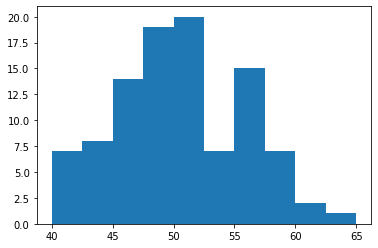

In [22]:
plt.hist(results)

In [23]:
#Mean
dist.mean()

50.0

In [24]:
#PMF of 50
dist.pmf(50)

0.07958923738717888

In [25]:
#CDF of 50
dist.cdf(50)

0.5397946186935897

In [26]:
#Inverse CDF of 50
1 - dist.cdf(50)

0.4602053813064103

In [27]:
#Manual Recreation of a CDF
x = 0
for i in range(51):
    x += dist.pmf(i)
x

0.5397946186935751

Say we have only 3 trials instead of 100 - we can plot the different PMF values for each different number of successes.

<BarContainer object of 4 artists>

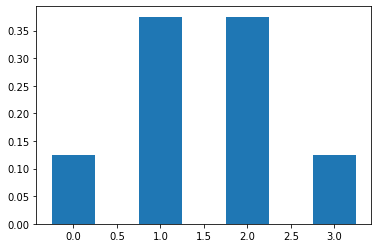

In [28]:
values = np.array([])
pmf_values = np.array([])
for i in range(4):
    values = np.append(values, i)
    pmf_values = np.append(pmf_values, stats.binom.pmf(n=3, p=0.5, k=i))
plt.bar(values, height=pmf_values, width=0.5)

## An Aside: Creating Nicer Plots in Matplotlib

Now is as good a time as any to learn a few more things about how to make better visualizations in Python with Matplotlib. We briefly covered some of this in Week 2.

First, we can put in a line of code to make our plot bigger. We can use the 'figsize' argument to put in a custom size for the height and width of our graph.

<BarContainer object of 4 artists>

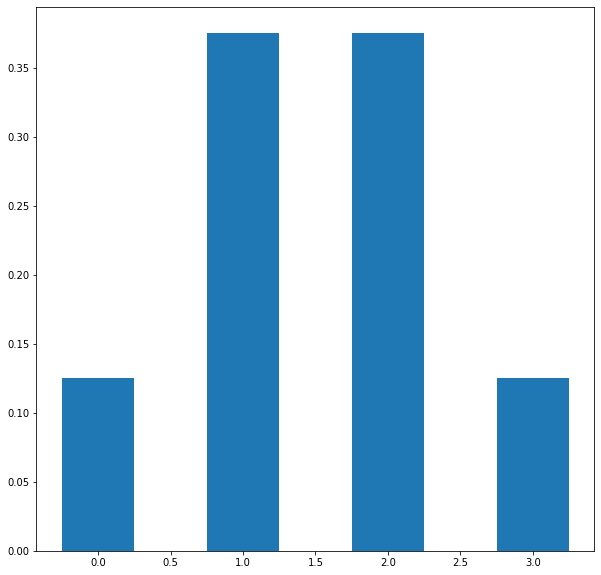

In [29]:
#Plot a Histogram - The Fig Line is to Make the Graph Bigger
fig = plt.figure(figsize=(10,10))
plt.bar(values, height=pmf_values, width=0.5)

Now we can customize the ticks along the x axis

<BarContainer object of 4 artists>

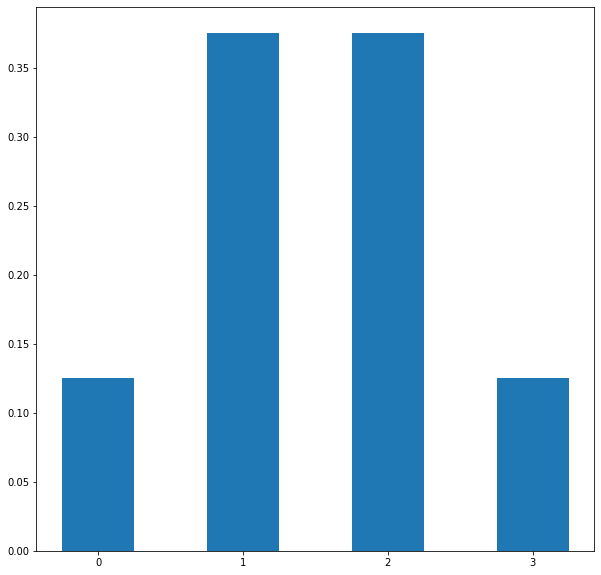

In [30]:
fig = plt.figure(figsize=(10,10))
plt.xticks(range(4))
plt.bar(values, height=pmf_values, width=0.5)

We can add a title...

Text(0.5, 0.92, 'PMFs for 3 Coin Flips')

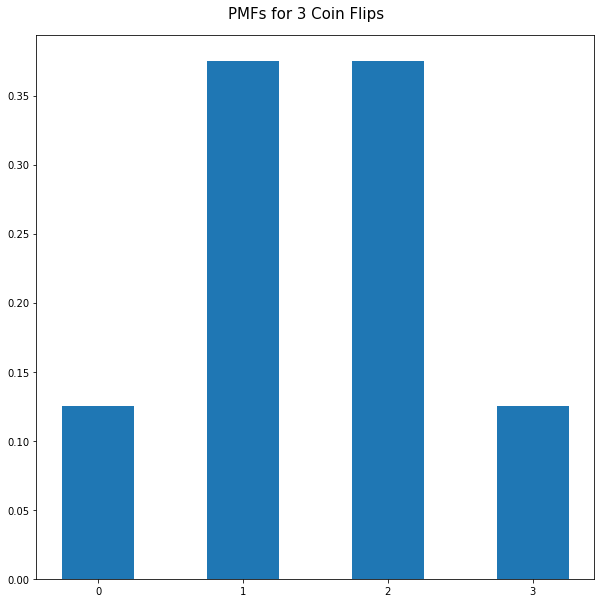

In [31]:
fig = plt.figure(figsize=(10,10))
plt.xticks(range(4))
plt.bar(values, height=pmf_values, width=0.5)
fig.suptitle('PMFs for 3 Coin Flips', fontsize=15, y=0.92)

And labels for our X and Y axes:

Text(0.5, 0.92, 'PMFs for 3 Coin Flips')

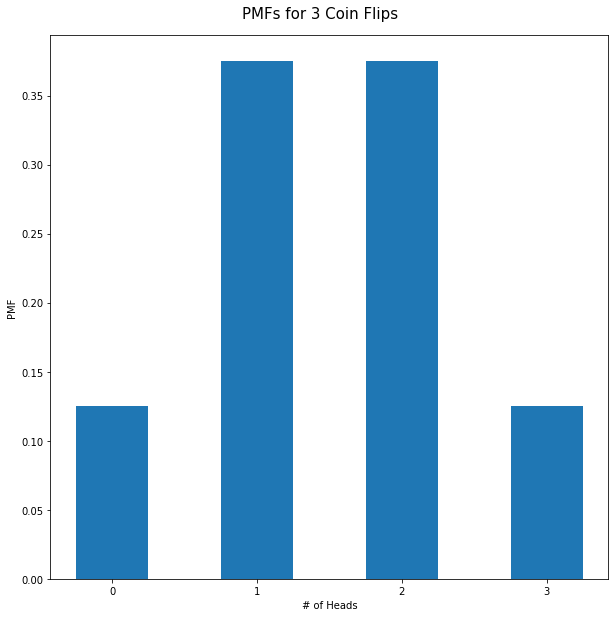

In [32]:
fig = plt.figure(figsize=(10,10))
plt.xticks(range(4))
plt.bar(values, height=pmf_values, width=0.5)
plt.xlabel('# of Heads')
plt.ylabel('PMF')
fig.suptitle('PMFs for 3 Coin Flips', fontsize=15, y=0.92)

Having a title and X and Y labels are **required** for any visualizations submitted for your project. They are not required for the homework unless specifically asked for, but it's a good habit to start doing this and at least know how to do it for when you need it.

### Back to Binomial

Below is a CDF plot for the different values in 3 trials.

In [33]:
values = np.array([])
cdf_values = np.array([])
for i in range(4):
    values = np.append(values, i)
    cdf_values = np.append(cdf_values, stats.binom.cdf(n=3, p=0.5, k=i))

You can use either a bar graph or line graph to plot a CDF, but a line graph makes more sense.

Text(0.5, 0.92, 'CDF Values for 3 Coin Flips')

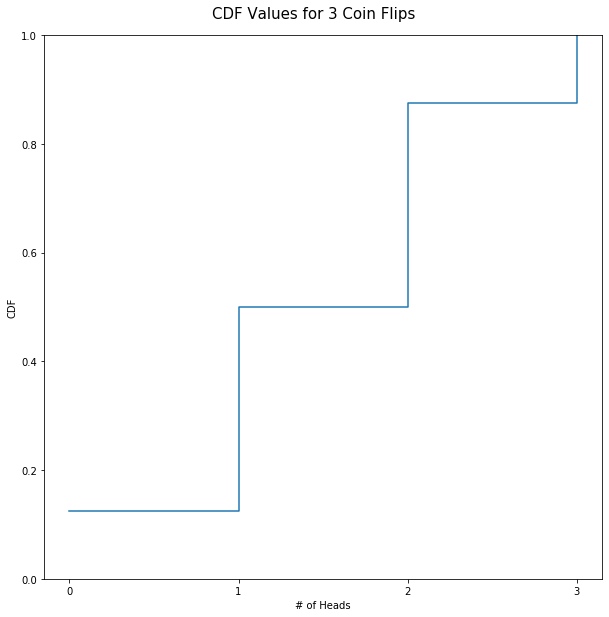

In [34]:
fig = plt.figure(figsize=(10,10))
plt.xticks(range(4))
plt.plot(values, cdf_values,  drawstyle='steps-post', linestyle='-')
plt.xlabel('# of Heads')
plt.ylabel('CDF')
plt.ylim([0,1])
fig.suptitle('CDF Values for 3 Coin Flips', fontsize=15, y=0.92)

## Geometric Distribution

We can also simulate a geometric distribution to see how many coins we will need to flip to get our first heads. Again, note here that we only have one input for this distribution.

In [35]:
dist = stats.geom(0.5)

In [36]:
#Mean
dist.mean()

2.0

In [37]:
#PMF
dist.pmf(1)

0.5

In [38]:
#PMF
dist.pmf(2)

0.25

In [39]:
#PMF
dist.pmf(3)

0.125

In [40]:
#CDF
dist.cdf(3)

0.875

In [41]:
#Inverse CDF
1 - dist.cdf(3)

0.125

In [42]:
values = np.array([])
pmf_values = np.array([])
#Why is the minimum one here?
for i in range(1,6):
    values = np.append(values, i)
    pmf_values = np.append(pmf_values, stats.geom.pmf(p=0.5, k=i))

Text(0.5, 0.92, 'PMFs for 5 Coin Flips')

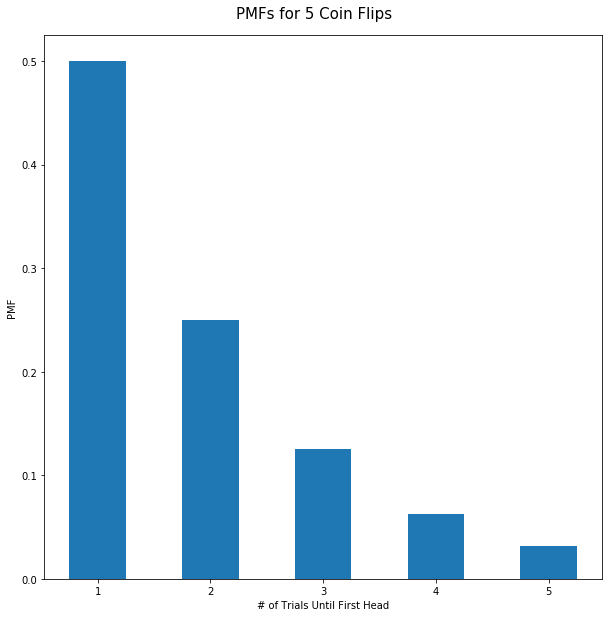

In [43]:
fig = plt.figure(figsize=(10,10))
plt.xticks(range(1,6))
plt.bar(values, height=pmf_values, width=0.5)
plt.xlabel('# of Trials Until First Head')
plt.ylabel('PMF')
fig.suptitle('PMFs for 5 Coin Flips', fontsize=15, y=0.92)

In [44]:
values = np.array([])
cdf_values = np.array([])
for i in range(1,6):
    values = np.append(values, i)
    cdf_values = np.append(cdf_values, stats.geom.cdf(p=0.5, k=i))

Text(0.5, 0.92, 'CDFs for 5 Coin Flips')

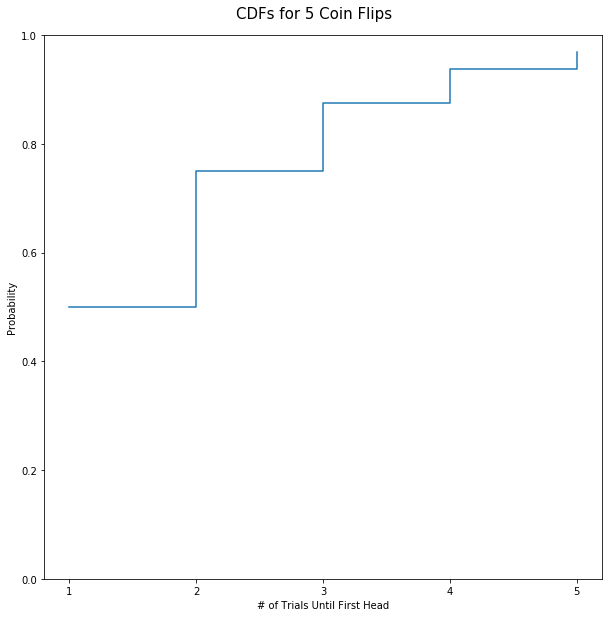

In [45]:
fig = plt.figure(figsize=(10,10))
plt.xticks(range(1,6))
plt.plot(values, cdf_values,  drawstyle='steps-post', linestyle='-')
plt.xlabel('# of Trials Until First Head')
plt.ylabel('Probability')
plt.ylim([0,1])
fig.suptitle('CDFs for 5 Coin Flips', fontsize=15, y=0.92)

## Baseball Example

Below we have an example with Aaron Judge. Let's say he has a 'true batting average' of .275, and he gets up to bat 500 times in a season.

There are two ways to simulate this - one by taking 500 samples of a Bernoulli distribution with a probability of .275 ten times, and one by taking 1 sample of a Binomial distribution with a probability of .275 and 500 trials ten times. This is the same thing.

In [46]:
np.random.seed(42)
for i in range(10):
    print(stats.bernoulli(p=0.275).rvs(500).sum() / 500)

0.284
0.252
0.296
0.274
0.262
0.298
0.25
0.272
0.238
0.296


In [47]:
np.random.seed(42)
for i in range(10):
    print(stats.binom(p=0.275, n=500).rvs() / 500)

0.262
0.278
0.246
0.24
0.294
0.278
0.274
0.29
0.242
0.278


Let's do this again, but only with 50 trials instead of 500 trials. What is different about these results compared to our earlier results?

In [48]:
np.random.seed(42)
for i in range(10):
    print(stats.binom(p=0.275, n=50).rvs() / 50)

0.26
0.38
0.32
0.28
0.22
0.22
0.18
0.34
0.28
0.3


There is more variation here than in the previous trials, due to the **Law of Large Numbers**. We will cover this concept later in the course.